# LAB 05: Random networks

July 26th 2022

* This is a python tutorial on random graphs.
* There is no marking for this tutorial. You do not need to submit your solution to us, but this exercise will help you to start working on your project
* In the begining of this tutorial you will find a similar code than used in the class. In the end, there are exercises for you.
* We recommend you to solve this lab until next tuesday (August 2nd).

## Random networks

Here we will work with the G(n,p) Erdös-Renyi model, in which a graph on n vertices is randomly generated by connecting each pair of vertices with probability p.

* Create a function that recieves n and p and returns a G(n,p) Erdös-Renyi graph
* Generate a graph with size 50, p=0.5. Draw the resulting graph.
* Generate a sequence G1 of 100 G(n,p) graphs with n=50, and p=0.2
* Compare the observed number of edges of G1 with the expected number of edges.
* Compute a function that estimates p for a given graph
* Generate a sequence G2 of G(n,p) graphs of sizes 10, 50, 100, and 1000, and p=0.2. Use the network x function.
* Estimate p for each graph in G2.
* Generate a sequence G3 of graphs of size 100 with p = 1/10000, 1/1000, 1/500, 1/100, 1/50, 1/10, 0.5 and 1. 
* What is the size of the largest connected component for each graph?




[1, 2, 3, 28, 72, 100, 100, 100]

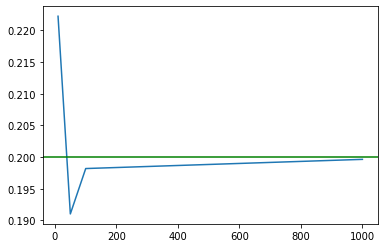

In [ ]:
from networkx.generators.line import inverse_line_graph
import networkx as nx
import random
import matplotlib.pyplot as plt

# Generate Erdos-Renyi graph

random.seed(0)

def gnp(n, p):
  G = nx.Graph()
  for i in range(1, n):
    for j in range(0, i):
      x = random.random()
      if (x < p):
        G.add_edge(i, j)
  return G

G = gnp(50, 0.5)

# Draw the network

nx.draw(G)

# Generate list of graphs with p=0.2

G1 = []

for i in range(100):
  G1.append(gnp(50, 0.2))

expected_L = (50*49/2)*0.2 

L = [G.number_of_edges() for G in G1]

# Compare the observed number of edges with the expected L
%matplotlib inline
plt.boxplot(L)
plt.axhline(y=expected_L, color='b')

# Generate list of graphs with different sizes

p = 0.2
G2 = []
sizes = [10, 50, 100, 1000]
for N in sizes:
  G2.append(nx.gnp_random_graph(N, p))

L2 = [G.number_of_edges() for G in G2]

# Estimate p

def estimate_p(G):
  N = G.number_of_nodes()
  L = G.number_of_edges()
  max_edges = N*(N-1)/2
  return L/max_edges

phat = [estimate_p(G) for G in G2]

# Comparing the estimated p with the observed p
%matplotlib inline
plt.plot(sizes, phat)
plt.axhline(p, color='g')

# Generate graphs varying p
N = 100
ps = [1/10000, 1/1000, 1/500, 1/100, 1/50, 1/10, 0.5, 1]
G3 = [nx.gnp_random_graph(N, p) for p in ps]

# Check largest component size
lcc_size = []
for G in G3:
  comp_sizes = [len(C) for C in nx.connected_components(G)]
  lcc_size.append(max(comp_sizes))

lcc_size


## Exercise 


* What is the number of vertices and edges of the network you chose for your project? Suppose that it is an Erdös-Rényi graph. What is the estimated probability $p$ of having an edge between two nodes?
* Generate a random graph with the same number of vertices and the same $p$. 
* Compare the estimated degree distribution with the expected degree distribution (tip: have a look at the function scipy.stats.binom.pmf(r, n, p))
* Compare the degree distribution of the random network to the degree distribution of your dataset
* Create a random process that generates graphs and receives the following parameters: the size of the network $n$, the number of clusters $k$, the probability of connections between nodes from different clusters $p_0$, and the probability of connecting nodes within the same cluster $p_1$. The process most assign a cluster for each node randomly with probability 1/k. It must return a networkx object.